<a href="https://colab.research.google.com/github/smusman/Semantic-Segmentation/blob/main/VGG_SegNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Semantic Segmentation
## SegNet with VGG Backbone

In [1]:
!pip install segmentation-models

     |████████████████████████████████| 50 kB 4.0 MB/s 


In [2]:
!pip install q tensorflow==2.2

     |████████████████████████████████| 516.2 MB 4.5 kB/s 
     |████████████████████████████████| 2.9 MB 29.8 MB/s 
     |████████████████████████████████| 3.0 MB 39.1 MB/s 
     |████████████████████████████████| 454 kB 48.3 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tensorflow-estimator-2.7.0:
      Successfully uninstalled tensorflow-estimator-2.7.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.7.0
    Uninstalling tensorboard-2.7.0:
      Successfully uninstalled tensorboard-2.7.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Successfully uninstalled gast-0.4.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.7.0
    Uninstalli

In [3]:
!pip install q keras==2.3.0

     |████████████████████████████████| 377 kB 5.1 MB/s 
  Attempting uninstall: keras
    Found existing installation: keras 2.7.0
    Uninstalling keras-2.7.0:
      Successfully uninstalled keras-2.7.0


In [4]:
!pip install keras-segmentation

     |████████████████████████████████| 3.3 MB 7.6 MB/s 
  Created wheel for keras-segmentation: filename=keras_segmentation-0.3.0-py3-none-any.whl size=29070 sha256=046deb5f6cacde9b0478af04dfcda33b26e34bc9153f262dc68df24f3844f5b7
  Stored in directory: /root/.cache/pip/wheels/68/dc/b3/596a3e2461ba16e935ef31661c26e823f841cfb577cec4c47a
Successfully built keras-segmentation
  Attempting uninstall: imageio
    Found existing installation: imageio 2.4.1
    Uninstalling imageio-2.4.1:
      Successfully uninstalled imageio-2.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


### Mount Drive

In [5]:
from google.colab import drive
drive.mount('/content/drive/') 

Mounted at /content/drive/


### Importing packages

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import cv2
import tensorflow as tf
from keras_segmentation.models.segnet import vgg_segnet



Using TensorFlow backend.


### Data Path

In [7]:
files_path = "/content/drive/MyDrive/A3_Dataset.zip (Unzipped Files)/A3_Dataset/dataset1"

In [8]:
train_label_dir=os.path.join(files_path+'/annotations_prepped_train')
train_image_dir=os.path.join(files_path+'/images_prepped_train')
test_label_dir=os.path.join(files_path+'/annotations_prepped_test')
test_image_dir=os.path.join(files_path+'/images_prepped_test')

### Count of Data

In [9]:
#Total Number
print('Total Training Images: ',len(os.listdir(train_image_dir)))
print('Total Training Grouth Truth: ',len(os.listdir(train_label_dir)))
print('Total Test Images: ',len(os.listdir(test_image_dir)))
print('Total Grouth Truth: ',len(os.listdir(test_label_dir)))

Total Training Images:  367
Total Training Grouth Truth:  367
Total Test Images:  101
Total Grouth Truth:  101


### Getting path of Images

In [10]:
train_image = [os.path.join(train_image_dir,fname) for fname in os.listdir(train_image_dir)[:]]
train_label = [os.path.join(train_label_dir,fname) for fname in os.listdir(train_label_dir)[:]]

test_image = [os.path.join(test_image_dir,fname) for fname in os.listdir(test_image_dir)[:]]
test_label = [os.path.join(test_label_dir,fname) for fname in os.listdir(test_label_dir)[:]]

### Loading data

In [11]:
image_size = (224,224)

#function to load data
def open_image(img):
    return np.array(Image.open(img).resize(image_size, Image.NEAREST))

train_images = np.stack([open_image(i) for i in train_image])
train_labels = np.stack([open_image(i) for i in train_label])
test_images = np.stack([open_image(i) for i in test_image])
test_labels = np.stack([open_image(i) for i in test_label])

print('Train Images Shape: ',train_images.shape)
print('Train labels Shape: ',train_labels.shape)
print('Test Images Shape: ',test_images.shape)
print('Test labels Shape: ',test_labels.shape)

Train Images Shape:  (367, 224, 224, 3)
Train labels Shape:  (367, 224, 224)
Test Images Shape:  (101, 224, 224, 3)
Test labels Shape:  (101, 224, 224)


### Displaying Loaded data

<function matplotlib.pyplot.show>

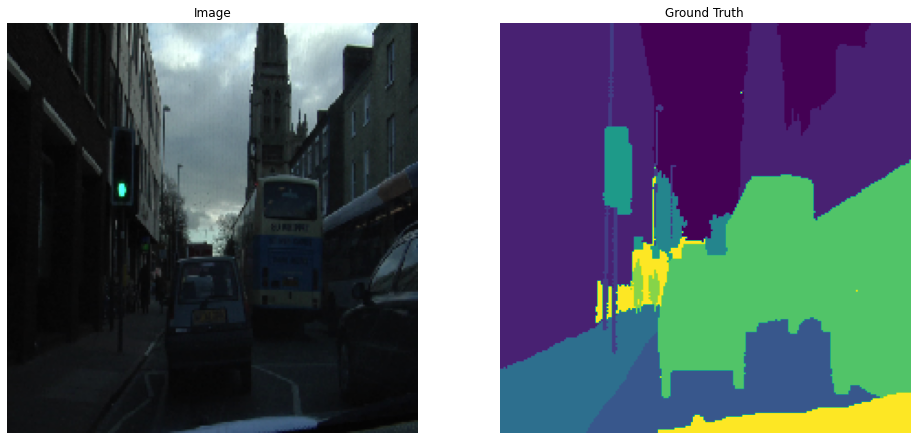

In [12]:
plt.figure(figsize = (25,25))
cells_color=[1, 1, 0]

image= train_images[0]
mask= train_labels[0]

#plotting image
plt.subplot(1, 3, 1)
plt.imshow(image)
plt.axis('off')
plt.title('Image')

#plotting ground label
plt.subplot(1, 3, 2)
plt.imshow(mask)
plt.axis('off')
plt.title('Ground Truth')
plt.show

### Loading Model

In [13]:
model = vgg_segnet(n_classes=12 ,  input_height=224, input_width=224)

58892288/58889256 [==============================] - 7s 0us/step


In [14]:
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

### Model Training on Augmented Data

In [15]:
model.train(
    train_images =  train_image_dir,
    train_annotations = train_label_dir,
    input_height=224,
    input_width=224,
    n_classes=12,
    do_augment=True,
    val_images=test_image_dir,
    val_annotations=test_label_dir,
    augmentation_name="aug_all",
    epochs=50,
    validate=True,
    batch_size=2,
    val_batch_size=2,
    steps_per_epoch=100,
    val_steps_per_epoch=50,
)

Verifying training dataset


100%|██████████| 367/367 [00:07<00:00, 50.59it/s]


Dataset verified! 
Verifying validation dataset


100%|██████████| 101/101 [00:02<00:00, 47.01it/s]


Dataset verified! 
Epoch 1/50


/usr/local/lib/python3.7/dist-packages/imgaug/augmenters/segmentation.py:191: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  segments = segmentation.slic(image, n_segments=n_segments_samples[i], compactness=10)


100/100 [==============================] - 89s 892ms/step - loss: 1.9290 - accuracy: 0.4499 - val_loss: 1.8719 - val_accuracy: 0.5210
Epoch 2/50
100/100 [==============================] - 76s 757ms/step - loss: 1.5412 - accuracy: 0.5220 - val_loss: 2.5957 - val_accuracy: 0.4885
Epoch 3/50
100/100 [==============================] - 89s 886ms/step - loss: 1.3242 - accuracy: 0.5905 - val_loss: 1.7700 - val_accuracy: 0.5084
Epoch 4/50
100/100 [==============================] - 74s 737ms/step - loss: 1.2622 - accuracy: 0.5959 - val_loss: 1.3631 - val_accuracy: 0.5813
Epoch 5/50
100/100 [==============================] - 88s 883ms/step - loss: 1.2305 - accuracy: 0.6102 - val_loss: 1.4309 - val_accuracy: 0.5733
Epoch 6/50
100/100 [==============================] - 80s 805ms/step - loss: 1.1879 - accuracy: 0.6326 - val_loss: 1.2915 - val_accuracy: 0.5859
Epoch 7/50
100/100 [==============================] - 79s 791ms/step - loss: 1.1247 - accuracy: 0.6383 - val_loss: 1.5260 - val_accuracy: 0.5

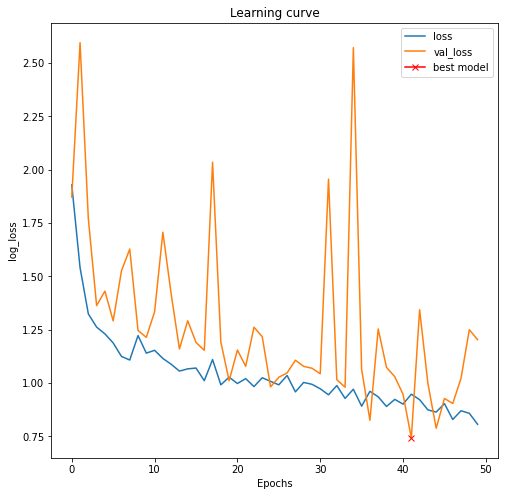

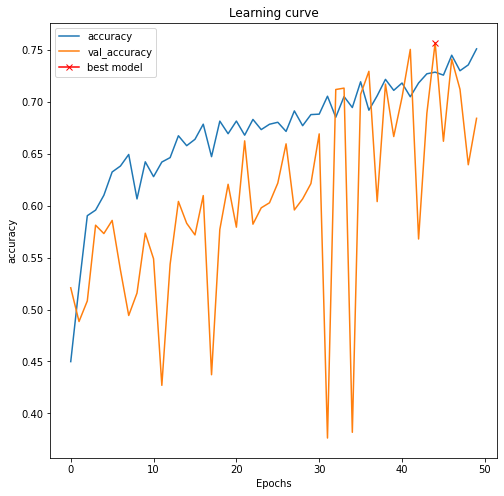

In [16]:
plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(model.history.history["loss"], label="loss")
plt.plot(model.history.history["val_loss"], label="val_loss")
plt.plot( np.argmin(model.history.history["val_loss"]), np.min(model.history.history["val_loss"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("log_loss")
plt.legend();
plt.show()

plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(model.history.history["accuracy"], label="accuracy")
plt.plot(model.history.history["val_accuracy"], label="val_accuracy")
plt.plot( np.argmax(model.history.history["val_accuracy"]), np.max(model.history.history["val_accuracy"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend();
plt.show()

### Quantitative Result

In [17]:
print(model.evaluate_segmentation( inp_images_dir=test_image_dir  , annotations_dir=test_label_dir ) )

101it [00:07, 14.01it/s]

{'frequency_weighted_IU': 0.498211395400407, 'mean_IU': 0.2136337122906838, 'class_wise_IU': array([0.76203932, 0.51704823, 0.        , 0.76701514, 0.09387001,
       0.38954554, 0.        , 0.        , 0.03408632, 0.        ,
       0.        , 0.        ])}


In [18]:
sample_image=[os.path.join(test_image_dir,fname) for fname in os.listdir(test_image_dir)[:]][0]

In [19]:
o = model.predict_segmentation(
    inp=sample_image,
    out_fname="/tmp/out.png" , overlay_img=True, show_legends=True,
    class_names = [ "Sky",    "Building", "Pole","Road","Pavement","Tree","SignSymbol", "Fence", "Car","Pedestrian", "Bicyclist"]

)

### Qaulitative Result

<function matplotlib.pyplot.show>

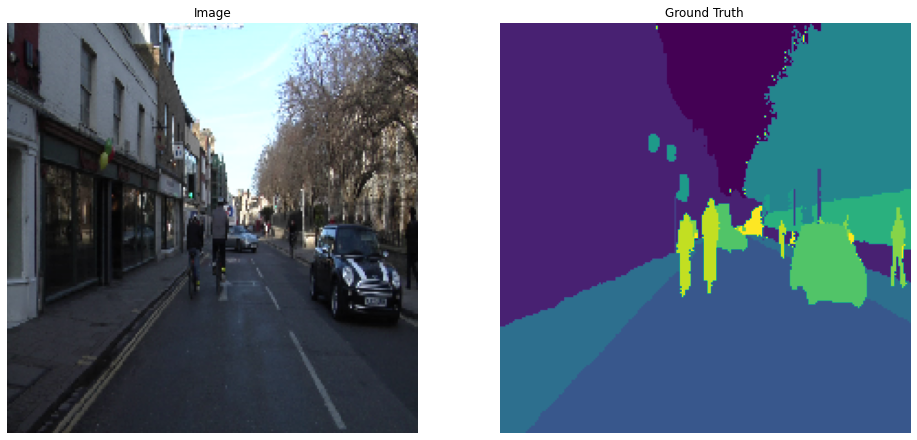

In [20]:
plt.figure(figsize = (25,25))
image= test_images[0]
mask= test_labels[0]

#plotting image
plt.subplot(1, 3, 1)
plt.imshow(image)
plt.axis('off')
plt.title('Image')

#plotting ground label
plt.subplot(1, 3, 2)
plt.imshow(mask)
plt.axis('off')
plt.title('Ground Truth')
plt.show

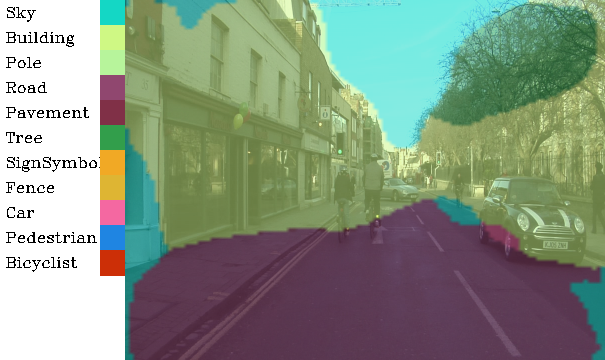

In [21]:
from IPython.display import Image
Image('/tmp/out.png')